# Figure: ExoIris example

**Author:** Hannu Parviainen <br>
**Edited:** 12 August 2025

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, setp, GridSpec, Figure
from matplotlib.patches import FancyBboxPatch, Rectangle
from numpy import linspace
from exoiris import load_model, clean_knots

In [3]:
ts = load_model("03a.fits")

In [4]:
mflux = ts._tsa.transit_model(ts.optimizer_population[ts._tsa._de_imin])
mflux = [mf[0] for mf in mflux]

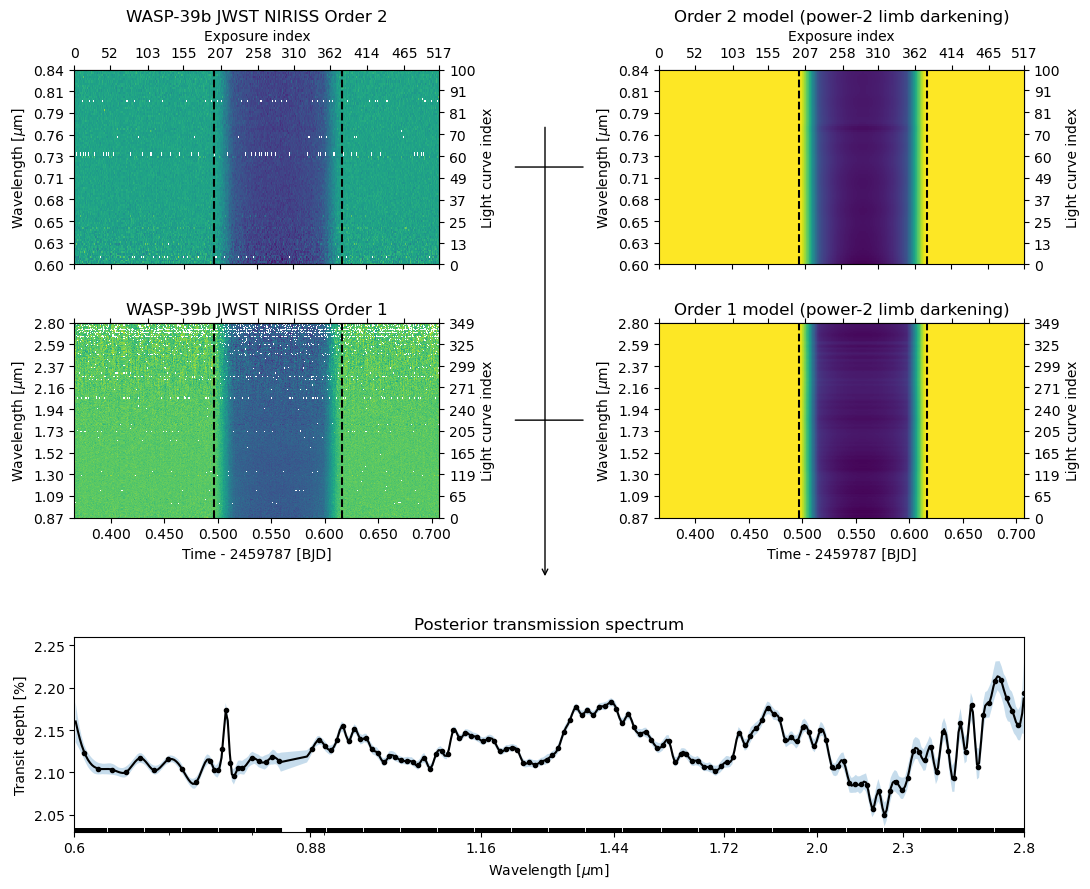

In [24]:
fig = Figure(figsize=(11, 9), constrained_layout=True)

gs = GridSpec(4, 3, width_ratios=(0.6, 0.1, 0.6), height_ratios=(0.35, 0.35, 0.005, 0.35), figure=fig)

axs1 = fig.add_subplot(gs[0,0]), fig.add_subplot(gs[1,0])
axs2 = fig.add_subplot(gs[0,2]), fig.add_subplot(gs[1,2])
ax3 = fig.add_subplot(gs[-1, :])

ts.data.plot(axs=axs1)
ts.data.plot(axs=axs2, data=mflux)
ts.plot_transmission_spectrum(result='mcmc', ax=ax3, xscale='log', ylim=(2.03, 2.26), xticks=[0.6, 0.88, 1.16, 1.44, 1.72, 2.0, 2.30, 2.8])

setp([axs1[0], axs2[0]], xlabel='')

for ax in (axs1[1], axs2[1]):
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))

for ax in (axs1[1].axx2, axs2[1].axx2):
    ax.set_xlabel(None)
    setp(ax.get_xticklabels(), visible=False)

#setp([axs1[1].axx2, axs2[1].axx2], xlabel='')
setp(ax3, xlim=(0.6, 2.8))
setp(axs1[0].get_xticklabels() + axs2[0].get_xticklabels(), visible=False)

[ax.set_title(f'WASP-39b JWST NIRISS Order {2-i}') for i, ax in enumerate(axs1)]
[ax.set_title(f'Order {2-i} model (power-2 limb darkening)') for i, ax in enumerate(axs2)]
ax3.set_title('Posterior transmission spectrum')
#fig.suptitle('WASP-39b JWST NIRISS Low-Resolution Transmission Spectroscopy', y=0.99, fontsize='x-large')
fig.tight_layout()

axs2[0].annotate("", 
                 xy=(1.2, 0.5), xycoords = axs1[0].transAxes,
                 xytext=(-0.2, 0.5), textcoords= axs2[0].transAxes,
                 arrowprops=dict(arrowstyle="-"))

axs2[1].annotate("", 
                 xy=(1.2, 0.5), xycoords = axs1[1].transAxes,
                 xytext=(-0.2, 0.5), textcoords= axs2[1].transAxes,
                 arrowprops=dict(arrowstyle="-"))

axs2[0].annotate("", 
                 xy=(0.50, 0.35), xycoords = fig.transFigure,
                 xytext=(0.5, 0.855), textcoords=fig.transFigure,
                 arrowprops=dict(arrowstyle="->"))

fig.savefig('example1.png', dpi=100)
fig

---

<center>&copy;2025 Hannu Parviainen</center>